In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from keras.utils.np_utils import to_categorical

%matplotlib inline
from PIL import Image
import os, glob, random
import random, math

import numpy as np
import optuna
import os
from PIL import Image

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

import keras.backend as K

In [129]:
# npy, npzファイル：Numpy配列 ndarray を保存するバイナリファイル
outfile_x_train="resistors_org_data_x_train.npz"
outfile_y_train="resistors_org_data_y_train.npz"
#保存ファイル名
max_photo_train=10
photo_size=60
x_train=[]#画像データ
y_train=[]#ラベルデータ
#各抵抗値
categories = ["10","22","47",
              "100","220","470",
              "1k",
              "2.2k","4.7k",
              "10k","22k","47k",
              "100k","220k","470k",
              "1M","2.2M"]

#path以下の画像を読み込む
def glob_files(path,label):
    files=glob.glob(path+"/*.JPG")
    random.shuffle(files)
    #各ファイルを処理
    num=0
    #print(files)
    for f in files:
        if num >=max_photo_train:break
        num+=1
        #画像ファイルを読む
        img=cv2.imread(f)
        img=cv2.resize(img, (photo_size_train,photo_size_train ))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=np.asarray(img)
        x_train.append(img)
        y_train.append(label)
        
    print(num)
    
def main():
    for cat, label in zip(categories, range(len(categories))):
        #各画像のフォルダーを読む(./は現在のフォルダ)
        glob_files("./resistors/" + cat, label)
    
    #x(学習データ),y(ラベル)の対応は維持したままシャッフル
    for l in [x_train, y_train]:
        np.random.seed(1)
        np.random.shuffle(l) 
    
    #ファイルへ保存
    np.savez(outfile_x_train, x=x_train)
    np.savez(outfile_y_train, y=y_train)#xとyがnumpyのリストとして与えられる
    print("保存しました："+outfile_x_train,len(x_train))
    print("保存しました："+outfile_y_train,len(x_train))
    
# コマンドラインでファイルを指定して起動された場合は True で実行される
# importでインポートされた場合は False で実行されない
if __name__=="__main__":
    main()

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
保存しました：resistors_org_data_x_train.npz 170
保存しました：resistors_org_data_y_train.npz 170


In [130]:
# npy, npzファイル：Numpy配列 ndarray を保存するバイナリファイル
outfile_x_test="resistors_org_data_x_test.npz"
outfile_y_test="resistors_org_data_y_test.npz"#保存ファイル名
max_photo_test=5
photo_size=60
x_test=[]#画像データ
y_test=[]#ラベルデータ
#各抵抗値
categories = ["10","22","47",
              "100","220","470",
              "1k",
              "2.2k","4.7k",
              "10k","22k","47k",
              "100k","220k","470k",
              "1M","2.2M"]

#path以下の画像を読み込む
def glob_files(path,label):
    files=glob.glob(path+"/*.JPG")
    random.shuffle(files)
    #各ファイルを処理
    num=0
    #print(files)
    for f in files:
        if num >=max_photo_test:break
        num+=1
        #画像ファイルを読む
        img=cv2.imread(f)
        img=cv2.resize(img, (photo_size_test,photo_size_test ))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=np.asarray(img)
        x_test.append(img)
        y_test.append(label)
        
    print(num)
    
def main():
    for cat, label in zip(categories, range(len(categories))):
        #各画像のフォルダーを読む(./は現在のフォルダ)
        glob_files("./resistors_test/" + cat, label)
    
    #x(学習データ),y(ラベル)の対応は維持したままシャッフル
    for l in [x_test, y_test]:
        np.random.seed(1)
        np.random.shuffle(l) 
    
    #ファイルへ保存
    np.savez(outfile_x_test, x=x_test)
    np.savez(outfile_y_test, y=y_test)#xとyがnumpyのリストとして与えられる
    print("保存しました："+outfile_x_test,len(x_test))
    print("保存しました："+outfile_y_test,len(y_test))
    
# コマンドラインでファイルを指定して起動された場合は True で実行される
# importでインポートされた場合は False で実行されない
if __name__=="__main__":
    main()

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
保存しました：resistors_org_data_x_test.npz 85
保存しました：resistors_org_data_y_test.npz 85


1


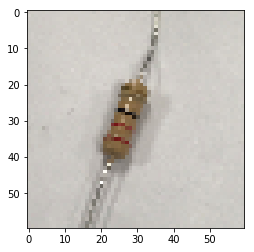

5


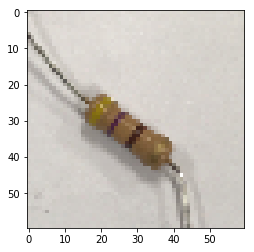

In [131]:
plt.imshow(x_train[2])
print(y_train[2])
plt.show()
plt.imshow(x_test[2])
print(y_test[2])
plt.show()

In [132]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# ImageDataGeneratorクラスのオブジェクト生成
datagen = ImageDataGenerator(
        rotation_range=45,
        vertical_flip=True,
        horizontal_flip=True,
        shear_range=3,#
        brightness_range=[0.3, 1.0])#明暗
#validation_splitでvalidationデータとtrainデータに分ける必要はないのか？いらない気がしてきた

def images_gen(x_list,y_list):
    x_list_add=[]
    y_list_add=[]
    for x ,y in zip(x_list,y_list):#xは(3, 150, 150)で受け取る
        x = x.reshape((1,) + x.shape)  #(1, 3, 150, 150)に変換する

        batch_list=[]
        i = 0
        
        # flowメソッド：numpyデータとラベルの配列を受け取り、拡張/正規化したデータのバッチを生成
        for batch in datagen.flow(x, batch_size=1):
            batch=batch.astype(np.uint8)#データ型を揃える
            batch=batch.reshape((photo_size, photo_size, 3))
            x_list_add.append(batch)
            y_list_add.append(y)
            i += 1
            if i > 5:#１枚から40枚作る(計13600=20*17*40)#
                break             
    x_np_add=np.array(x_list_add)
    y_np_add=np.array(y_list_add)

    #x(学習データ),y(ラベル)の対応は維持したままシャッフル
    for l in [x_np_add, y_np_add]:
        np.random.seed(1)
        np.random.shuffle(l) 

    return x_np_add,y_np_add

In [133]:
#入力と出力を指定
im_rows=photo_size_train
im_cols=photo_size_train
im_color=3
in_shape=(im_rows,im_cols,im_color)
nb_classes=17

In [134]:
#写真データを読み込み

photos_x_train=np.load(outfile_x_train)
print(type(photos_x_train))
x_train=photos_x_train["x"]
print(type(x_train))
photos_y_train=np.load(outfile_y_train)
y_train=photos_y_train["y"]

photos_x_test=np.load(outfile_x_test)
x_test=photos_x_test["x"]

photos_y_test=np.load(outfile_y_test)
y_test=photos_y_test["y"]

<class 'numpy.lib.npyio.NpzFile'>
<class 'numpy.ndarray'>


In [135]:
#読み込んだデータを三次元配列に変換
x_train=x_train.reshape(-1,im_rows,im_cols,im_color)
x_test=x_test.reshape(-1,im_rows,im_cols,im_color)

In [136]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(170, 60, 60, 3)
(170,)
(85, 60, 60, 3)
(85,)


In [137]:
#水増し
x_add_train,y_add_train=images_gen(x_train,y_train)

outfile_add_train="resistors_add1700_data_train.npz"#保存ファイル名

#ファイルへ保存
np.savez(outfile_add_train, x=x_add_train, y=y_add_train)
print("保存しました："+outfile_add_train,len(x_add_train))

x_add_test,y_add_test=images_gen(x_test, y_test)

outfile_add_test="resistors_add1700_data_test.npz"#保存ファイル名

#ファイルへ保存
np.savez(outfile_add_test, x=x_add_test, y=y_add_test)
print("保存しました："+outfile_add_test,len(x_add_test))

保存しました：resistors_add1700_data_train.npz 1020
保存しました：resistors_add1700_data_test.npz 510


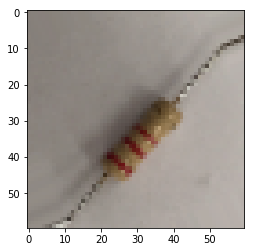

7


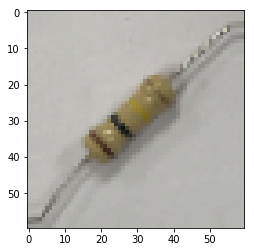

12


In [138]:
n = 50
plt.imshow(x_add_train[n])
plt.show()
print(y_add_train[n])

n= 50
plt.imshow(x_add_test[n])
plt.show()
print(y_add_test[n])

12


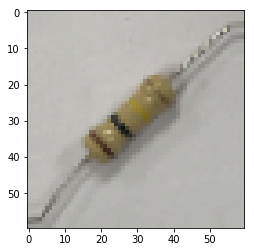

In [139]:
n = 50
plt.imshow(x_add_test[n])
print(y_add_test[n])

In [140]:
import keras
from keras.models import  Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import  RMSprop

#cnnのモデルを定義する

def def_model(in_shape,nb_classes):
    model=Sequential()
    model.add(Conv2D(32,
                    kernel_size=(3,3),
                    activation="relu",
                    input_shape=in_shape))
    model.add(Conv2D(32,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),activation="relu"))
    model.add(Conv2D(64,(3,3),activation="relu",name="relu_conv2"))
   #最後の畳み込み層の名称を後ほど使うので定義しておく。
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes,activation="softmax"))
    
    return model

#コンパイル済みのcnnのモデルを返す

def get_model(in_shape,nb_classes):
    model=def_model(in_shape,nb_classes)
    model.compile(
        loss="categorical_crossentropy",
        optimizer=RMSprop(),
        metrics=["accuracy"])
    return model

Train on 1020 samples, validate on 510 samples
Epoch 1/20
1020/1020 [==============================] - ETA: 4s - loss: 2.8417 - accuracy: 0.04 - 9s 8ms/step - loss: 3.0718 - accuracy: 0.0539 - val_loss: 2.8333 - val_accuracy: 0.0667
Epoch 2/20
1020/1020 [==============================] - ETA: 2s - loss: 2.8369 - accuracy: 0.05 - 7s 7ms/step - loss: 2.8353 - accuracy: 0.0461 - val_loss: 2.8332 - val_accuracy: 0.0549
Epoch 3/20
1020/1020 [==============================] - ETA: 2s - loss: 2.8330 - accuracy: 0.08 - 7s 7ms/step - loss: 2.8336 - accuracy: 0.0706 - val_loss: 2.8332 - val_accuracy: 0.0588
Epoch 4/20
1020/1020 [==============================] - ETA: 3s - loss: 2.8332 - accuracy: 0.06 - 7s 7ms/step - loss: 2.8331 - accuracy: 0.0627 - val_loss: 2.8329 - val_accuracy: 0.0745
Epoch 5/20
1020/1020 [==============================] - ETA: 2s - loss: 2.8327 - accuracy: 0.08 - 7s 7ms/step - loss: 2.8340 - accuracy: 0.0657 - val_loss: 2.8331 - val_accuracy: 0.0647
Epoch 6/20
1020/1020 [=

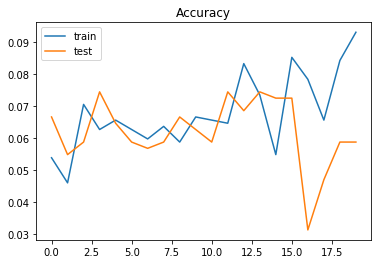

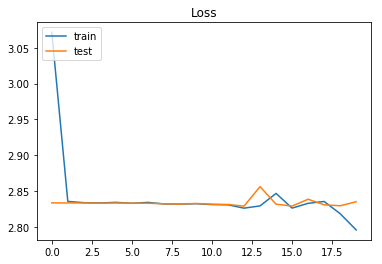

In [141]:
from sklearn.model_selection import train_test_split

#写真データを読み込み
photos_train=np.load("./resistors_add1700_data_train.npz")
x_train=photos_train["x"]
y_train=photos_train["y"]

photos_test=np.load("./resistors_add1700_data_test.npz")
x_test=photos_test["x"]
y_test=photos_test["y"]


#読み込んだデータを三次元配列に変換
x_train=x_train.reshape(-1,im_rows,im_cols,im_color)
x_train=x_train.astype("float32")/255

x_test=x_test.reshape(-1,im_rows,im_cols,im_color)
x_test=x_test.astype("float32")/255
#ラベルデータをone-hotベクトルに直す
y_train=to_categorical(y_train.astype("int32"),nb_classes)

y_test=to_categorical(y_test.astype("int32"),nb_classes)
#学習用とテスト用に分ける
#x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
#cnnモデルを取得
model=get_model(in_shape,nb_classes)

#学習を実行
hist=model.fit(x_train,y_train,
              batch_size=512,
              epochs=20,
              verbose=1,
              validation_data=(x_test,y_test))

#モデルを評価
score=model.evaluate(x_test,y_test,verbose=1)
print("正解率=",score[1],"loss=",score[0])

#学習の様子をグラフへ描写
#正解率の推移をプロット
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train","test"],loc="upper left")
plt.show()

#ロスの推移をプロット
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss")
plt.legend(["train","test"],loc="upper left")
plt.show()

model.save_weights("./batch_512_photo_size=60_batch_size=32_epochs=23_per_.hdf5")

In [142]:
10 * 17 * 1000

170000

In [143]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2

photo="IMG_9349.jpg"
labels = ["10","22","47",
              "100","220","470",
              "1k","2.2k","4.7k",
              "10k","22k","47k",
              "100k","220k","470k",
              "1M","2.2M"]

def get_model(in_shape,nb_classes):
    model=def_model(in_shape,nb_classes)
    model.compile(
        loss="categorical_crossentropy",
        optimizer=RMSprop(),
        metrics=["accuracy"])
    return model

model= get_model((photo_size,photo_size,3),17)#画像のshape、ラベルデータの数
model.load_weights("./resistors-model_RMSprop.hdf5")

img=cv2.imread(photo)
img=cv2.resize(img, (photo_size,photo_size))#画像のshape
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
    #arrayに変換
x=np.asarray(img)
x=x.reshape(-1,photo_size,photo_size,3)#画像のshape
x=x/255
    #予測する！！
pre=model.predict([x])[0]
idx=pre.argmax()
per=int(pre[idx]*100)
print("これは"+str(per)+"%の確率で"+labels[idx]+"です！！")

OSError: Unable to open file (unable to open file: name = './resistors-model_RMSprop.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)